# Load Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
%matplotlib inline

# Data Processing

In [2]:
#READ HISTORICAL_WILDFIRE DATA
df1=pd.read_csv('Historical_Wildfires.csv')

#READ HISTORICALWEATHER DATA
df2_1=pd.read_csv('HistoricalWeather.csv')

#READ VEGETATIONINDEX DATA
df3=pd.read_csv('VegetationIndex.csv')

In [3]:
#EXPLORE HISTORICAL_WILDFIRE DATA HEAD
df1.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [4]:
df1.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

In [5]:
#EXPLORE HISTORICALWEATHER DATA HEAD
df2_1.head()

,Date,Region,Parameter,count()[unit: km^2],min(),max(),mean(),variance()
0,2005-01-01,NSW,Precipitation,800234.348986,0.000000,1.836935,0.044274,0.028362
1,2005-01-01,NSW,RelativeHumidity,800234.348986,13.877194,80.522964,36.355567,253.559937
2,2005-01-01,NSW,SoilWaterContent,800234.348986,0.002245,0.414305,0.170931,0.007758
3,2005-01-01,NSW,SolarRadiation,800234.348986,14.515009,32.169781,26.749389,6.078587
4,2005-01-01,NSW,Temperature,800234.348986,14.485785,35.878704,27.341182,18.562212


In [6]:
df2_1.dtypes

Date                    object
Region                  object
Parameter               object
count()[unit: km^2]    float64
min()                  float64
max()                  float64
mean()                 float64
variance()             float64
dtype: object

In [7]:
#EXPLORE VEGETATIONINDEX DATA HEAD
df3.head()

,Region,Date,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
0,NSW,1/1/2005,0.349202,0.9972,-0.2,0.204862,0.041968
1,NSW,2/1/2005,0.357403,0.9772,-0.2,0.208673,0.043544
2,NSW,3/1/2005,0.354087,0.9750,-0.2,0.209450,0.043869
3,NSW,4/1/2005,0.347242,0.9904,-0.2,0.207307,0.042976
4,NSW,5/1/2005,0.345526,0.9972,-0.2,0.202858,0.041151


In [8]:
#CONVERT DATE TO PANDAS DATETIME
df1['Date'] = pd.to_datetime(df1['Date'])

In [9]:
#EXPLORE MINIMUM DATE BY REGION
df1.groupby(['Region'])['Date'].min()

Region
NSW   2005-01-04
NT    2005-01-01
QL    2005-01-01
SA    2005-01-06
TA    2005-01-21
VI    2005-01-02
WA    2005-01-01
Name: Date, dtype: datetime64[ns]

In [10]:
#EXPLORE MAXIMUM DATE BY REGION
df1.groupby(['Region'])['Date'].max()

Region
NSW   2020-10-31
NT    2020-10-31
QL    2020-10-31
SA    2020-10-22
TA    2020-10-26
VI    2020-10-30
WA    2020-10-31
Name: Date, dtype: datetime64[ns]

In [12]:
#SPLIT INTO SEPERATE REGIONS

df1_filter_nsw = df1['Region']=="NSW"
df1_nsw=df1[df1_filter_nsw]

df1_filter_nt = df1['Region']=="NT"
df1_nt=df1[df1_filter_nt]

df1_filter_ql = df1['Region']=="QL"
df1_ql=df1[df1_filter_ql]

df1_filter_sa = df1['Region']=="SA"
df1_sa=df1[df1_filter_sa]

df1_filter_ta = df1['Region']=="TA"
df1_ta=df1[df1_filter_ta]

df1_filter_vi = df1['Region']=="VI"
df1_vi=df1[df1_filter_vi]

df1_filter_wa = df1['Region']=="WA"
df1_wa=df1[df1_filter_wa]

In [13]:
#REINDEX EACH REGION
idx=pd.date_range('01-01-2005', '10-31-2020')

df1_nsw.set_index('Date', inplace=True)
df1_nsw = df1_nsw.reindex(idx)
df1_nsw['Region'].fillna('NSW', inplace=True)

df1_nt.set_index('Date', inplace=True)
df1_nt = df1_nt.reindex(idx)
df1_nt['Region'].fillna('NT', inplace=True)

df1_ql.set_index('Date', inplace=True)
df1_ql = df1_ql.reindex(idx)
df1_ql['Region'].fillna('QL', inplace=True)

df1_sa.set_index('Date', inplace=True)
df1_sa = df1_sa.reindex(idx)
df1_sa['Region'].fillna('SA', inplace=True)

df1_ta.set_index('Date', inplace=True)
df1_ta = df1_ta.reindex(idx)
df1_ta['Region'].fillna('TA', inplace=True)

df1_vi.set_index('Date', inplace=True)
df1_vi = df1_vi.reindex(idx)
df1_vi['Region'].fillna('VI', inplace=True)

df1_wa.set_index('Date', inplace=True)
df1_wa = df1_wa.reindex(idx)
df1_wa['Region'].fillna('WA', inplace=True)

In [15]:
#Concatenate regional reindexed dataframes

df1_all = pd.concat([df1_nsw, df1_nt, df1_ql, df1_sa, df1_ta, df1_vi, df1_wa])
df1_all.reset_index(level=0, inplace=True)
df1_all.rename(columns={'index':'Date'}, inplace=True)

In [17]:
df1_all.head()

,Date,Region,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,2005-01-01,NSW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-01-02,NSW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-01-03,NSW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005-01-04,NSW,8.68000,312.266667,42.4000,78.666667,2.886751,8.333333,3.0,R
4,2005-01-05,NSW,16.61125,322.475000,62.3625,85.500000,8.088793,65.428571,8.0,R


In [18]:
#PIVOT WEATHER DATA ON COLUMN "PARAMETER" WITH INDEX OF REGION & DATE

df2=df2_1.pivot(index=["Region","Date"], columns="Parameter",
                values=["mean()","min()","max()","variance()"])

df2.columns = df2.columns.droplevel(0)
df2.columns.name = None
df2 = df2.reset_index()
df2['Date'] = pd.to_datetime(df2['Date'])

#REORDER WEATHER DATA COLUMNS

df2.columns=['Region',
             'Date',
             'Mean Precip',
             'Mean RH',
             'Mean SWC',
             'Mean SR',
             'Mean Temp',
             'Mean Wind',
             'Min Precip',
             'Min RH',
             'Min SWC',
             'Min SR',
             'Min Temp',
             'Min Wind',
             'Max Precip',
             'Max RH',
             'Max SWC',
             'Max SR',
             'Max Temp',
             'Max Wind',
             'Var Precip',
             'Var RH',
             'Var SWC',
             'Var SR',
             'Var Temp',
             'Var Wind']

In [19]:
df2.head()

,Region,Date,Mean Precip,Mean RH,Mean SWC,Mean SR,Mean Temp,Mean Wind,Min Precip,Min RH,...,Max SWC,Max SR,Max Temp,Max Wind,Var Precip,Var RH,Var SWC,Var SR,Var Temp,Var Wind
0,NSW,2005-01-01,0.044274,36.355567,0.170931,26.749389,27.341182,3.323550,0.0,13.877194,...,0.414305,32.169781,35.878704,7.670482,0.028362,253.559937,0.007758,6.078587,18.562212,0.850048
1,NSW,2005-01-02,0.173879,38.699607,0.169551,27.047523,26.143898,3.030897,0.0,20.738882,...,0.404071,34.308487,33.976604,7.448905,0.271386,224.769253,0.007293,11.737577,22.320857,0.470928
2,NSW,2005-01-03,3.011912,49.365152,0.179981,24.197452,27.408810,3.958409,0.0,26.145630,...,0.405569,32.525158,34.744976,8.515941,10.308246,167.044018,0.006598,6.106235,16.619341,2.002952
3,NSW,2005-01-04,2.808620,57.095628,0.214293,22.617291,23.055527,4.841764,0.0,31.279930,...,0.444927,33.214062,28.945488,7.364222,17.383363,267.158378,0.009965,40.255460,9.455474,1.494301
4,NSW,2005-01-05,0.157935,47.170735,0.203951,28.076835,22.425765,4.014080,0.0,24.466665,...,0.442955,33.554867,29.510120,7.091141,0.273471,195.639724,0.009483,29.763055,13.352380,1.043316


In [20]:
#CREATE KEY 'DATEMONTH' ON HISTORICAL_WILDFIRE FROM 'DATE'
df1_all['DateMonth'] = df1_all['Date'].to_numpy().astype('datetime64[M]')
df1_all['DateMonth'] = pd.to_datetime(df1_all['DateMonth'])

#CREATE KEY 'DATEMONTH' ON VEGETATIONINDEX FROM 'DATE'
df3 = df3.rename(columns={'Date': 'DateMonth'})
df3['DateMonth'] = pd.to_datetime(df3['DateMonth'])
df3['DateMonth'] = df3['DateMonth'].to_numpy().astype('datetime64[M]')

In [21]:
#MERGE HISTORICAL_WILDFIRE AND HISTORICALWEATHER DATA

df4=df1_all.merge(df2, on=["Region","Date"], how='left')

#MERGE HISTORICAL_WILDFIRE/HISTORICALWEATHER AND VEGETATIONINDEX DATA

df=df4.merge(df3, on=["Region","DateMonth"], how='left')

In [22]:
#SELECT RELEVANT COLUMNS TO THE PROJECT SCOPE

df = df[['Date',
         'Region',
         'Estimated_fire_area',
         'Mean Temp',
         'Mean Wind',
         'Mean SR',
         'Mean Precip',
         'Mean RH',
         'Mean SWC',
         'Min Precip',
         'Min RH',
         'Min SWC',
         'Min SR',
         'Min Temp',
         'Min Wind',
         'Max Precip',
         'Max RH',
         'Max SWC',
         'Max SR',
         'Max Temp',
         'Max Wind',
         'Var Precip',
         'Var RH',
         'Var SWC',
         'Var SR',
         'Var Temp',
         'Var Wind',
         'Vegetation_index_mean',
         'Vegetation_index_max',
         'Vegetation_index_min',
         'Vegetation_index_std',
         'Vegetation_index_variance']]

In [24]:
df.dtypes

Date                         datetime64[ns]
Region                               object
Estimated_fire_area                 float64
Mean Temp                           float64
Mean Wind                           float64
Mean SR                             float64
Mean Precip                         float64
Mean RH                             float64
Mean SWC                            float64
Min Precip                          float64
Min RH                              float64
Min SWC                             float64
Min SR                              float64
Min Temp                            float64
Min Wind                            float64
Max Precip                          float64
Max RH                              float64
Max SWC                             float64
Max SR                              float64
Max Temp                            float64
Max Wind                            float64
Var Precip                          float64
Var RH                          

In [23]:
df.head()

,Date,Region,Estimated_fire_area,Mean Temp,Mean Wind,Mean SR,Mean Precip,Mean RH,Mean SWC,Min Precip,...,Var RH,Var SWC,Var SR,Var Temp,Var Wind,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
0,2005-01-01,NSW,NaN,27.341182,3.323550,26.749389,0.044274,36.355567,0.170931,0.0,...,253.559937,0.007758,6.078587,18.562212,0.850048,0.349202,0.9972,-0.2,0.204862,0.041968
1,2005-01-02,NSW,NaN,26.143898,3.030897,27.047523,0.173879,38.699607,0.169551,0.0,...,224.769253,0.007293,11.737577,22.320857,0.470928,0.349202,0.9972,-0.2,0.204862,0.041968
2,2005-01-03,NSW,NaN,27.408810,3.958409,24.197452,3.011912,49.365152,0.179981,0.0,...,167.044018,0.006598,6.106235,16.619341,2.002952,0.349202,0.9972,-0.2,0.204862,0.041968
3,2005-01-04,NSW,8.68000,23.055527,4.841764,22.617291,2.808620,57.095628,0.214293,0.0,...,267.158378,0.009965,40.255460,9.455474,1.494301,0.349202,0.9972,-0.2,0.204862,0.041968
4,2005-01-05,NSW,16.61125,22.425765,4.014080,28.076835,0.157935,47.170735,0.203951,0.0,...,195.639724,0.009483,29.763055,13.352380,1.043316,0.349202,0.9972,-0.2,0.204862,0.041968


## Splitting DataFrame into Regions

In [25]:
#SPLITTING DATA FRAME INTO REGIONAL DATA FRAMES, DROP REGION, SET/ORDER INDEX ON DATE

#New South Wales
region_nsw=df['Region']=="NSW"
df_nsw=df[region_nsw]
df_nsw = df_nsw.drop(['Region'], axis=1)
df_nsw = df_nsw.set_index('Date')
df_nsw.sort_index(inplace=True)
#Northern Territory
region_nt=df['Region']=="NT"
df_nt=df[region_nt]
df_nt=df_nt.drop(['Region'], axis=1)
df_nt = df_nt.set_index('Date')
df_nt.sort_index(inplace=True)
#Queensland
region_ql=df['Region']=="QL"
df_ql=df[region_ql]
df_ql=df_ql.drop(['Region'], axis=1)
df_ql = df_ql.set_index('Date')
df_ql.sort_index(inplace=True)
#Australia
region_sa=df['Region']=="SA"
df_sa=df[region_sa]
df_sa=df_sa.drop(['Region'], axis=1)
df_sa = df_sa.set_index('Date')
df_sa.sort_index(inplace=True)
#Tasmania
region_ta=df['Region']=="TA"
df_ta=df[region_ta]
df_ta=df_ta.drop(['Region'], axis=1)
df_ta = df_ta.set_index('Date')
df_ta.sort_index(inplace=True)
#Victoria
region_vi=df['Region']=="VI"
df_vi=df[region_vi]
df_vi=df_vi.drop(['Region'], axis=1)
df_vi = df_vi.set_index('Date')
df_vi.sort_index(inplace=True)
#Western Australia
region_wa=df['Region']=="WA"
df_wa=df[region_wa]
df_wa=df_wa.drop(['Region'], axis=1)
df_wa = df_wa.set_index('Date')
df_wa.sort_index(inplace=True)

In [26]:
#CHECK OUTPUT OF EACH REGIONAL DATA FRAME

df_nsw.head(2)

,Estimated_fire_area,Mean Temp,Mean Wind,Mean SR,Mean Precip,Mean RH,Mean SWC,Min Precip,Min RH,Min SWC,...,Var RH,Var SWC,Var SR,Var Temp,Var Wind,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-01,NaN,27.341182,3.323550,26.749389,0.044274,36.355567,0.170931,0.0,13.877194,0.002245,...,253.559937,0.007758,6.078587,18.562212,0.850048,0.349202,0.9972,-0.2,0.204862,0.041968
2005-01-02,NaN,26.143898,3.030897,27.047523,0.173879,38.699607,0.169551,0.0,20.738882,0.001210,...,224.769253,0.007293,11.737577,22.320857,0.470928,0.349202,0.9972,-0.2,0.204862,0.041968


In [27]:
df_nt.head(2)

,Estimated_fire_area,Mean Temp,Mean Wind,Mean SR,Mean Precip,Mean RH,Mean SWC,Min Precip,Min RH,Min SWC,...,Var RH,Var SWC,Var SR,Var Temp,Var Wind,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-01,4.945,29.881492,5.296892,19.781791,9.884958,61.494675,0.167735,0.0,14.558820,0.000000e+00,...,584.201131,0.026743,58.942658,12.920252,1.930014,0.300478,0.9986,-0.2,0.152621,0.023293
2005-01-02,1.320,28.863760,4.912403,19.321222,8.061692,67.543438,0.182831,0.0,24.545588,5.487818e-07,...,350.439419,0.022078,34.117853,7.575619,1.750100,0.300478,0.9986,-0.2,0.152621,0.023293


In [28]:
df_ql.head(2)

,Estimated_fire_area,Mean Temp,Mean Wind,Mean SR,Mean Precip,Mean RH,Mean SWC,Min Precip,Min RH,Min SWC,...,Var RH,Var SWC,Var SR,Var Temp,Var Wind,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-01,38.831579,28.842866,3.483753,27.056979,1.453053,47.959364,0.185641,0.0,14.443199,0.0,...,403.134377,0.012679,29.500832,13.792599,0.883048,0.357081,0.9995,-0.2,0.181695,0.033013
2005-01-02,64.464286,29.416449,3.145954,26.276294,1.544607,48.593844,0.177612,0.0,19.908998,0.0,...,418.233850,0.011915,27.100196,10.519515,0.951232,0.357081,0.9995,-0.2,0.181695,0.033013


In [29]:
df_sa.head(2)

,Estimated_fire_area,Mean Temp,Mean Wind,Mean SR,Mean Precip,Mean RH,Mean SWC,Min Precip,Min RH,Min SWC,...,Var RH,Var SWC,Var SR,Var Temp,Var Wind,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-01,NaN,30.793675,4.657538,27.142643,0.059078,30.057683,0.056047,0.0,10.618136,0.000000e+00,...,246.044713,0.001917,7.914246,34.799336,1.655908,0.179208,0.9634,-0.2,0.076393,0.005836
2005-01-02,NaN,30.668115,4.580500,26.912085,0.352733,35.461572,0.059845,0.0,21.138067,5.487818e-07,...,96.301368,0.001855,11.159859,15.584442,1.319493,0.179208,0.9634,-0.2,0.076393,0.005836


In [30]:
df_ta.head(2)

,Estimated_fire_area,Mean Temp,Mean Wind,Mean SR,Mean Precip,Mean RH,Mean SWC,Min Precip,Min RH,Min SWC,...,Var RH,Var SWC,Var SR,Var Temp,Var Wind,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-01,NaN,11.788805,5.408138,26.755711,3.099497,65.086764,0.211360,0.003973,43.906574,0.000000e+00,...,111.754034,0.007121,12.826400,4.912013,2.963118,0.638585,0.992,-0.2,0.16984,0.028846
2005-01-02,NaN,10.857520,4.594067,23.992531,2.312394,69.972967,0.223483,0.001452,48.479427,5.487818e-07,...,105.614468,0.008654,14.434154,4.088045,2.016709,0.638585,0.992,-0.2,0.16984,0.028846


In [31]:
df_vi.head(2)

,Estimated_fire_area,Mean Temp,Mean Wind,Mean SR,Mean Precip,Mean RH,Mean SWC,Min Precip,Min RH,Min SWC,...,Var RH,Var SWC,Var SR,Var Temp,Var Wind,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-01,NaN,17.084568,3.655508,24.623813,0.052024,56.456559,0.197559,0.0,31.754293,0.000000e+00,...,135.491207,0.005088,9.162359,9.465103,1.049487,0.430317,0.9912,-0.2,0.203939,0.041591
2005-01-02,2.8,16.235277,3.260354,31.379597,0.116511,53.486694,0.195793,0.0,25.823996,5.487818e-07,...,173.084107,0.004750,4.515507,13.459750,0.726214,0.430317,0.9912,-0.2,0.203939,0.041591


In [32]:
df_wa.head(2)

,Estimated_fire_area,Mean Temp,Mean Wind,Mean SR,Mean Precip,Mean RH,Mean SWC,Min Precip,Min RH,Min SWC,...,Var RH,Var SWC,Var SR,Var Temp,Var Wind,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-01,36.382500,28.524055,4.201039,26.967495,1.872415,49.027855,0.075728,0.0,16.942043,0.000000e+00,...,260.721015,0.003713,19.931596,17.695984,1.409677,0.219956,0.9968,-0.2,0.097231,0.009454
2005-01-02,148.106471,28.695349,4.650767,26.776612,2.110536,45.840524,0.079449,0.0,14.944283,5.487818e-07,...,335.890995,0.006084,29.720987,28.801638,2.707924,0.219956,0.9968,-0.2,0.097231,0.009454


In [33]:
df_nsw.tail(2)

,Estimated_fire_area,Mean Temp,Mean Wind,Mean SR,Mean Precip,Mean RH,Mean SWC,Min Precip,Min RH,Min SWC,...,Var RH,Var SWC,Var SR,Var Temp,Var Wind,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-30,1.320,17.367429,4.623190,21.780309,6.023114,65.992435,0.284530,0.0,23.371044,0.008776,...,272.160953,0.014347,17.436028,6.171237,2.912816,0.446502,0.9893,-0.1996,0.20641,0.042605
2020-10-31,20.276,16.746594,3.527583,21.262570,2.569159,68.400280,0.281282,0.0,39.851624,0.012940,...,160.672680,0.013632,16.523703,7.320792,0.745520,0.446502,0.9893,-0.1996,0.20641,0.042605


In [34]:
df_nt.tail(2)

,Estimated_fire_area,Mean Temp,Mean Wind,Mean SR,Mean Precip,Mean RH,Mean SWC,Min Precip,Min RH,Min SWC,...,Var RH,Var SWC,Var SR,Var Temp,Var Wind,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-30,171.325280,27.588366,3.789468,29.237004,0.023353,25.410253,0.072682,0.0,10.158679,0.0,...,223.787162,0.004703,1.961698,17.479871,1.896523,0.243616,0.9926,-0.2,0.100569,0.010114
2020-10-31,115.588461,28.483307,3.605941,28.753237,0.010738,27.439472,0.068836,0.0,10.292431,0.0,...,244.379596,0.004214,2.531528,11.273161,0.644622,0.243616,0.9926,-0.2,0.100569,0.010114


In [35]:
df_ql.tail(2)

,Estimated_fire_area,Mean Temp,Mean Wind,Mean SR,Mean Precip,Mean RH,Mean SWC,Min Precip,Min RH,Min SWC,...,Var RH,Var SWC,Var SR,Var Temp,Var Wind,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-30,282.538983,25.508412,4.199536,29.096387,0.131547,33.598036,0.146482,0.0,9.482860,0.0,...,312.224190,0.007119,2.526977,9.681245,1.608405,0.289288,0.9954,-0.2,0.140747,0.01981
2020-10-31,297.627826,24.777835,3.137745,28.745128,0.386800,35.829668,0.141467,0.0,12.749949,0.0,...,316.368911,0.006935,4.796284,8.811943,0.549077,0.289288,0.9954,-0.2,0.140747,0.01981


In [36]:
df_sa.tail(2)

,Estimated_fire_area,Mean Temp,Mean Wind,Mean SR,Mean Precip,Mean RH,Mean SWC,Min Precip,Min RH,Min SWC,...,Var RH,Var SWC,Var SR,Var Temp,Var Wind,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-30,NaN,16.665322,5.440276,24.173219,0.226583,52.744996,0.086115,0.0,18.542654,0.0,...,254.148778,0.006249,32.520743,4.101952,1.148932,0.243616,0.9926,-0.2,0.100569,0.010114
2020-10-31,NaN,18.947783,3.548225,26.530568,0.006940,45.700218,0.083082,0.0,12.512371,0.0,...,316.308826,0.005425,17.093209,9.466862,0.640926,0.243616,0.9926,-0.2,0.100569,0.010114


In [37]:
df_ta.tail(2)

,Estimated_fire_area,Mean Temp,Mean Wind,Mean SR,Mean Precip,Mean RH,Mean SWC,Min Precip,Min RH,Min SWC,...,Var RH,Var SWC,Var SR,Var Temp,Var Wind,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-30,NaN,11.402074,2.237367,20.941379,1.544969,80.245597,0.272828,0.000439,71.917526,0.0,...,11.334930,0.009799,5.255151,1.411955,0.821827,0.715092,0.9962,-0.2,0.142757,0.020379
2020-10-31,NaN,11.648813,2.501697,21.782732,0.472709,77.645878,0.264608,0.000703,69.801094,0.0,...,10.936866,0.009317,8.718983,2.388990,0.859296,0.715092,0.9962,-0.2,0.142757,0.020379


In [38]:
df_vi.tail(2)

,Estimated_fire_area,Mean Temp,Mean Wind,Mean SR,Mean Precip,Mean RH,Mean SWC,Min Precip,Min RH,Min SWC,...,Var RH,Var SWC,Var SR,Var Temp,Var Wind,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-30,2.0,14.722631,4.424107,18.705855,2.115115,80.286800,0.340007,0.000118,69.110474,0.0,...,45.99116,0.004985,6.353448,2.395385,2.182164,0.627716,0.9929,-0.1992,0.192436,0.037032
2020-10-31,NaN,13.167147,3.838360,19.553751,0.822028,78.326366,0.324260,0.000000,66.459290,0.0,...,44.76648,0.005050,9.917196,4.088503,1.019079,0.627716,0.9929,-0.1992,0.192436,0.037032


In [39]:
df_wa.tail(2)

,Estimated_fire_area,Mean Temp,Mean Wind,Mean SR,Mean Precip,Mean RH,Mean SWC,Min Precip,Min RH,Min SWC,...,Var RH,Var SWC,Var SR,Var Temp,Var Wind,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-30,42.397895,26.231115,4.211237,25.992187,0.334691,33.523594,0.051021,0.0,11.337550,0.0,...,234.092619,0.001420,6.403482,21.396151,0.970846,0.21364,0.9782,-0.2,0.09986,0.009972
2020-10-31,107.370851,28.090392,4.373947,26.746413,0.328437,34.193973,0.050737,0.0,9.272744,0.0,...,309.018764,0.001419,5.986063,15.293953,1.873607,0.21364,0.9782,-0.2,0.09986,0.009972


## Handling Missing Values

In [40]:
df_nsw.isnull().sum()

Estimated_fire_area          1160
Mean Temp                       2
Mean Wind                       4
Mean SR                         2
Mean Precip                     1
Mean RH                         6
Mean SWC                        0
Min Precip                      1
Min RH                          6
Min SWC                         0
Min SR                          2
Min Temp                        2
Min Wind                        4
Max Precip                      1
Max RH                          6
Max SWC                         0
Max SR                          2
Max Temp                        2
Max Wind                        4
Var Precip                      1
Var RH                          6
Var SWC                         0
Var SR                          2
Var Temp                        2
Var Wind                        4
Vegetation_index_mean           0
Vegetation_index_max            0
Vegetation_index_min            0
Vegetation_index_std            0
Vegetation_ind

In [41]:
df_nt.isnull().sum()

Estimated_fire_area          730
Mean Temp                      2
Mean Wind                      4
Mean SR                        2
Mean Precip                    1
Mean RH                        6
Mean SWC                       0
Min Precip                     1
Min RH                         6
Min SWC                        0
Min SR                         2
Min Temp                       2
Min Wind                       4
Max Precip                     1
Max RH                         6
Max SWC                        0
Max SR                         2
Max Temp                       2
Max Wind                       4
Var Precip                     1
Var RH                         6
Var SWC                        0
Var SR                         2
Var Temp                       2
Var Wind                       4
Vegetation_index_mean          0
Vegetation_index_max           0
Vegetation_index_min           0
Vegetation_index_std           0
Vegetation_index_variance      0
dtype: int

In [42]:
df_ql.isnull().sum()

Estimated_fire_area          250
Mean Temp                      2
Mean Wind                      4
Mean SR                        2
Mean Precip                    1
Mean RH                        6
Mean SWC                       0
Min Precip                     1
Min RH                         6
Min SWC                        0
Min SR                         2
Min Temp                       2
Min Wind                       4
Max Precip                     1
Max RH                         6
Max SWC                        0
Max SR                         2
Max Temp                       2
Max Wind                       4
Var Precip                     1
Var RH                         6
Var SWC                        0
Var SR                         2
Var Temp                       2
Var Wind                       4
Vegetation_index_mean          0
Vegetation_index_max           0
Vegetation_index_min           0
Vegetation_index_std           0
Vegetation_index_variance      0
dtype: int

In [43]:
df_sa.isnull().sum()

Estimated_fire_area          3793
Mean Temp                       2
Mean Wind                       4
Mean SR                         2
Mean Precip                     1
Mean RH                         6
Mean SWC                        0
Min Precip                      1
Min RH                          6
Min SWC                         0
Min SR                          2
Min Temp                        2
Min Wind                        4
Max Precip                      1
Max RH                          6
Max SWC                         0
Max SR                          2
Max Temp                        2
Max Wind                        4
Var Precip                      1
Var RH                          6
Var SWC                         0
Var SR                          2
Var Temp                        2
Var Wind                        4
Vegetation_index_mean           0
Vegetation_index_max            0
Vegetation_index_min            0
Vegetation_index_std            0
Vegetation_ind

In [44]:
df_ta.isnull().sum()

Estimated_fire_area          4379
Mean Temp                       2
Mean Wind                       4
Mean SR                         2
Mean Precip                     1
Mean RH                         6
Mean SWC                        0
Min Precip                      1
Min RH                          6
Min SWC                         0
Min SR                          2
Min Temp                        2
Min Wind                        4
Max Precip                      1
Max RH                          6
Max SWC                         0
Max SR                          2
Max Temp                        2
Max Wind                        4
Var Precip                      1
Var RH                          6
Var SWC                         0
Var SR                          2
Var Temp                        2
Var Wind                        4
Vegetation_index_mean           0
Vegetation_index_max            0
Vegetation_index_min            0
Vegetation_index_std            0
Vegetation_ind

In [45]:
df_vi.isnull().sum()

Estimated_fire_area          3607
Mean Temp                       2
Mean Wind                       4
Mean SR                         2
Mean Precip                     1
Mean RH                         6
Mean SWC                        0
Min Precip                      1
Min RH                          6
Min SWC                         0
Min SR                          2
Min Temp                        2
Min Wind                        4
Max Precip                      1
Max RH                          6
Max SWC                         0
Max SR                          2
Max Temp                        2
Max Wind                        4
Var Precip                      1
Var RH                          6
Var SWC                         0
Var SR                          2
Var Temp                        2
Var Wind                        4
Vegetation_index_mean           0
Vegetation_index_max            0
Vegetation_index_min            0
Vegetation_index_std            0
Vegetation_ind

In [46]:
df_wa.isnull().sum()

Estimated_fire_area          156
Mean Temp                      2
Mean Wind                      4
Mean SR                        2
Mean Precip                    1
Mean RH                        6
Mean SWC                       0
Min Precip                     1
Min RH                         6
Min SWC                        0
Min SR                         2
Min Temp                       2
Min Wind                       4
Max Precip                     1
Max RH                         6
Max SWC                        0
Max SR                         2
Max Temp                       2
Max Wind                       4
Var Precip                     1
Var RH                         6
Var SWC                        0
Var SR                         2
Var Temp                       2
Var Wind                       4
Vegetation_index_mean          0
Vegetation_index_max           0
Vegetation_index_min           0
Vegetation_index_std           0
Vegetation_index_variance      0
dtype: int

In [47]:
#Fill NaN values for Estimated Fire Area
df_nsw['Estimated_fire_area'].fillna(0, inplace=True)
df_nt['Estimated_fire_area'].fillna(0, inplace=True)
df_ql['Estimated_fire_area'].fillna(0, inplace=True)
df_sa['Estimated_fire_area'].fillna(0, inplace=True)
df_ta['Estimated_fire_area'].fillna(0, inplace=True)
df_vi['Estimated_fire_area'].fillna(0, inplace=True)
df_wa['Estimated_fire_area'].fillna(0, inplace=True)

In [48]:
#EXPLORE NULL DATA 
null_nsw = df_nsw[df_nsw.isnull().any(axis=1)]
null_nt = df_nt[df_nt.isnull().any(axis=1)]
null_ql = df_ql[df_ql.isnull().any(axis=1)]
null_sa = df_sa[df_sa.isnull().any(axis=1)]
null_ta = df_ta[df_ta.isnull().any(axis=1)]
null_vi = df_vi[df_vi.isnull().any(axis=1)]
null_wa = df_wa[df_wa.isnull().any(axis=1)]

In [49]:
null_nsw.head(6)

,Estimated_fire_area,Mean Temp,Mean Wind,Mean SR,Mean Precip,Mean RH,Mean SWC,Min Precip,Min RH,Min SWC,...,Var RH,Var SWC,Var SR,Var Temp,Var Wind,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
Date,,,,,,,,,,,,,,,,,,,,,
2006-08-19,13.512500,9.641613,2.308445,16.310927,0.047475,NaN,0.179532,0.0,NaN,0.001129,...,NaN,0.006149,4.271965,7.459332,0.189276,0.447575,0.9800,-0.2000,0.180444,0.032560
2009-02-08,26.300000,NaN,3.861615,28.499942,0.096440,NaN,0.149632,0.0,NaN,0.017044,...,NaN,0.004283,4.225705,NaN,3.195680,0.340743,0.9729,-0.2152,0.200092,0.040037
2014-01-10,0.000000,24.392267,2.362805,NaN,0.938572,59.694873,0.197198,0.0,29.38484,0.018461,...,149.799068,0.006925,NaN,12.820380,0.475424,0.320179,0.9955,-0.2000,0.178057,0.031704
2014-01-11,80.029630,27.123752,NaN,26.904596,0.352532,NaN,0.181117,0.0,NaN,0.010004,...,NaN,0.006466,3.752696,15.122395,NaN,0.320179,0.9955,-0.2000,0.178057,0.031704
2018-06-11,10.080000,12.739894,3.552904,10.164948,1.231254,NaN,0.222243,0.0,NaN,0.009660,...,NaN,0.009305,2.626982,12.928122,2.262670,0.400967,0.9892,-0.2000,0.210368,0.044255
2018-06-12,12.905556,11.478689,3.063410,9.866373,0.256699,NaN,0.221494,0.0,NaN,0.006472,...,NaN,0.010230,5.863737,2.667877,0.308503,0.400967,0.9892,-0.2000,0.210368,0.044255


In [50]:
null_nt.head(6)

,Estimated_fire_area,Mean Temp,Mean Wind,Mean SR,Mean Precip,Mean RH,Mean SWC,Min Precip,Min RH,Min SWC,...,Var RH,Var SWC,Var SR,Var Temp,Var Wind,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
Date,,,,,,,,,,,,,,,,,,,,,
2006-08-19,493.965426,19.497667,3.466174,21.581259,0.001280,NaN,0.068126,0.0,NaN,2.043555e-06,...,NaN,0.003791,1.270609,8.550165,0.707050,0.273765,0.9769,-0.2000,0.098252,0.009653
2009-02-08,0.000000,NaN,4.139762,21.338024,7.512906,NaN,0.178735,0.0,NaN,6.010911e-07,...,NaN,0.025239,40.175295,NaN,3.405661,0.346734,1.0670,-0.2596,0.158445,0.025105
2014-01-10,3.100000,30.989184,3.376385,NaN,2.244299,41.132442,0.091385,0.0,7.950668,0.000000e+00,...,706.99434,0.007888,NaN,5.120894,0.833286,0.311955,0.9986,-0.2000,0.152069,0.023125
2014-01-11,1.100000,31.653196,NaN,25.646295,2.532166,NaN,0.100128,0.0,NaN,1.450380e-06,...,NaN,0.009558,35.602351,9.984255,NaN,0.311955,0.9986,-0.2000,0.152069,0.023125
2018-06-11,165.610667,23.159882,2.919573,16.171010,0.042188,NaN,0.063246,0.0,NaN,9.934109e-08,...,NaN,0.003436,5.424529,6.438250,0.996497,0.289349,0.9954,-0.2000,0.117260,0.013750
2018-06-12,155.968068,22.267325,3.183548,16.568210,0.035522,NaN,0.062214,0.0,NaN,0.000000e+00,...,NaN,0.003284,2.260748,18.527466,0.610689,0.289349,0.9954,-0.2000,0.117260,0.013750


In [51]:
null_ql.head(6)

,Estimated_fire_area,Mean Temp,Mean Wind,Mean SR,Mean Precip,Mean RH,Mean SWC,Min Precip,Min RH,Min SWC,...,Var RH,Var SWC,Var SR,Var Temp,Var Wind,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
Date,,,,,,,,,,,,,,,,,,,,,
2006-08-19,59.169000,18.480937,2.893979,20.219926,0.008666,NaN,0.124570,0.0,NaN,2.043555e-06,...,NaN,0.003666,2.051810,6.671278,0.703204,0.308929,0.9845,-0.2000,0.151722,0.023020
2009-02-08,22.781000,NaN,3.688307,19.476571,9.807672,NaN,0.253117,0.0,NaN,6.010911e-07,...,NaN,0.020698,96.336519,NaN,1.510411,0.413757,1.0925,-0.2512,0.188985,0.035715
2014-01-10,1.430000,28.027184,3.498604,NaN,2.930275,60.653026,0.189738,0.0,20.423456,0.000000e+00,...,214.3336,0.008140,NaN,11.039082,0.804438,0.306370,0.9995,-0.2000,0.163255,0.026652
2014-01-11,28.411250,28.405260,NaN,22.651160,2.685785,NaN,0.187188,0.0,NaN,1.450380e-06,...,NaN,0.008294,24.182883,10.611010,NaN,0.306370,0.9995,-0.2000,0.163255,0.026652
2018-06-11,47.200000,19.465319,2.676335,15.194473,0.042822,NaN,0.123640,0.0,NaN,9.934109e-08,...,NaN,0.003768,4.149692,13.500994,0.946280,0.343469,0.9864,-0.2000,0.175700,0.030870
2018-06-12,92.911569,19.305401,2.768433,14.916085,0.242116,NaN,0.124148,0.0,NaN,0.000000e+00,...,NaN,0.003641,4.564021,11.505232,0.405208,0.343469,0.9864,-0.2000,0.175700,0.030870


In [52]:
null_sa.head(6)

,Estimated_fire_area,Mean Temp,Mean Wind,Mean SR,Mean Precip,Mean RH,Mean SWC,Min Precip,Min RH,Min SWC,...,Var RH,Var SWC,Var SR,Var Temp,Var Wind,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
Date,,,,,,,,,,,,,,,,,,,,,
2006-08-19,0.0,15.690520,3.754106,17.004990,0.003671,NaN,0.064067,0.0,NaN,2.043555e-06,...,NaN,0.003275,2.074407,7.754605,1.247970,0.239665,0.9629,-0.2000,0.155150,0.024072
2009-02-08,7.2,NaN,6.878877,27.299430,0.015489,NaN,0.060546,0.0,NaN,6.010911e-07,...,NaN,0.001751,10.573555,NaN,2.527251,0.171358,1.0350,-0.2788,0.072805,0.005301
2014-01-10,0.0,29.731356,4.139073,NaN,0.009533,31.242298,0.059180,0.0,9.092833,0.000000e+00,...,252.479377,0.001631,NaN,14.432704,1.070584,0.181064,0.9672,-0.2000,0.077673,0.006033
2014-01-11,0.0,29.824000,NaN,30.689388,0.003445,NaN,0.058231,0.0,NaN,1.450380e-06,...,NaN,0.001629,1.551414,25.866731,NaN,0.181064,0.9672,-0.2000,0.077673,0.006033
2018-06-11,0.0,14.874267,5.001013,10.615837,0.530381,NaN,0.115189,0.0,NaN,9.934109e-08,...,NaN,0.006453,2.308360,7.379375,2.142188,0.239611,0.9950,-0.2000,0.144288,0.020819
2018-06-12,0.0,11.970765,3.521780,9.823136,0.536798,NaN,0.108373,0.0,NaN,0.000000e+00,...,NaN,0.006441,11.959590,2.021287,1.424768,0.239611,0.9950,-0.2000,0.144288,0.020819


In [53]:
null_ta.head(6)

,Estimated_fire_area,Mean Temp,Mean Wind,Mean SR,Mean Precip,Mean RH,Mean SWC,Min Precip,Min RH,Min SWC,...,Var RH,Var SWC,Var SR,Var Temp,Var Wind,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
Date,,,,,,,,,,,,,,,,,,,,,
2006-08-19,0.0,7.332671,4.225402,8.716046,2.516017,NaN,0.289349,0.000000,NaN,2.043555e-06,...,NaN,0.010616,2.596430,3.853864,1.945459,0.667770,0.9875,-0.2000,0.194952,0.038006
2009-02-08,0.0,NaN,4.759034,21.995847,1.033623,NaN,0.229636,0.000000,NaN,6.010911e-07,...,NaN,0.008394,6.214274,NaN,2.148888,0.606060,1.0380,-0.2174,0.202008,0.040807
2014-01-10,0.0,18.038382,3.249015,NaN,0.528451,76.235461,0.237504,0.000000,62.165062,0.000000e+00,...,18.477304,0.008099,NaN,1.644815,0.728856,0.654818,0.9947,-0.2000,0.188930,0.035694
2014-01-11,10.8,15.841687,NaN,26.357654,0.305180,NaN,0.229945,0.000000,NaN,1.450380e-06,...,NaN,0.007736,17.659677,3.219392,NaN,0.654818,0.9947,-0.2000,0.188930,0.035694
2018-06-11,0.0,9.075780,4.644596,5.599965,2.345065,NaN,0.282664,0.000000,NaN,9.934109e-08,...,NaN,0.009829,0.646464,5.576724,3.697125,0.757761,0.9971,-0.2000,0.158004,0.024965
2018-06-12,0.0,8.424199,3.226503,2.928207,5.254570,NaN,0.296018,0.360674,NaN,0.000000e+00,...,NaN,0.010713,0.376692,3.959105,2.829791,0.757761,0.9971,-0.2000,0.158004,0.024965


In [54]:
null_vi.head(6)

,Estimated_fire_area,Mean Temp,Mean Wind,Mean SR,Mean Precip,Mean RH,Mean SWC,Min Precip,Min RH,Min SWC,...,Var RH,Var SWC,Var SR,Var Temp,Var Wind,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
Date,,,,,,,,,,,,,,,,,,,,,
2006-08-19,0.000000,8.605161,2.884000,11.671671,0.191253,NaN,0.257799,0.000000,NaN,2.043555e-06,...,NaN,0.006610,2.087202,5.069929,0.726783,0.617035,0.9661,-0.2000,0.182492,0.033303
2009-02-08,168.726106,NaN,5.007785,24.609960,0.361654,NaN,0.171679,0.000000,NaN,6.010911e-07,...,NaN,0.003085,7.812433,NaN,1.588085,0.377572,0.9920,-0.2286,0.206271,0.042548
2014-01-10,0.000000,23.957336,2.652602,NaN,0.030640,52.809592,0.186657,0.000000,30.536663,0.000000e+00,...,129.305602,0.003652,NaN,8.293758,0.650214,0.406831,0.9760,-0.2000,0.215024,0.046235
2014-01-11,0.000000,21.055849,NaN,29.401623,0.034710,NaN,0.183643,0.000000,NaN,1.450380e-06,...,NaN,0.003450,6.380650,14.471433,NaN,0.406831,0.9760,-0.2000,0.215024,0.046235
2018-06-11,0.000000,11.087028,5.071859,7.610445,7.697098,NaN,0.324296,0.392349,NaN,9.934109e-08,...,NaN,0.005281,1.163391,4.506753,2.613462,0.612049,0.9967,-0.2000,0.202574,0.041036
2018-06-12,13.440000,9.722834,4.240099,5.150591,2.280181,NaN,0.338269,0.025586,NaN,0.000000e+00,...,NaN,0.005803,2.575014,2.266163,1.408437,0.612049,0.9967,-0.2000,0.202574,0.041036


In [55]:
null_wa.head(6)

,Estimated_fire_area,Mean Temp,Mean Wind,Mean SR,Mean Precip,Mean RH,Mean SWC,Min Precip,Min RH,Min SWC,...,Var RH,Var SWC,Var SR,Var Temp,Var Wind,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
Date,,,,,,,,,,,,,,,,,,,,,
2006-08-19,122.626515,20.512840,4.073367,18.325061,0.667146,NaN,0.066912,0.0,NaN,2.043555e-06,...,NaN,0.004991,16.270288,7.344988,0.796910,0.275885,0.9807,-0.2000,0.126966,0.016120
2009-02-08,24.135455,NaN,6.069578,26.453286,0.710461,NaN,0.080486,0.0,NaN,6.010911e-07,...,NaN,0.006034,9.805221,NaN,3.458938,0.250221,1.0212,-0.2995,0.113457,0.012873
2014-01-10,101.224706,32.353415,4.840927,NaN,0.022227,28.800903,0.049843,0.0,6.914806,0.000000e+00,...,419.914635,0.001510,NaN,20.039287,2.239877,0.245676,0.9984,-0.2000,0.109100,0.011903
2014-01-11,336.712520,32.895708,NaN,30.684851,0.048187,NaN,0.049235,0.0,NaN,1.450380e-06,...,NaN,0.001442,3.544631,17.374980,NaN,0.245676,0.9984,-0.2000,0.109100,0.011903
2018-06-11,18.900000,16.045574,3.214017,13.498920,0.023784,NaN,0.130214,0.0,NaN,0.000000e+00,...,NaN,0.007112,8.417116,29.527245,0.996697,0.294080,0.9963,-0.2000,0.126009,0.015878
2018-06-12,69.453913,15.158437,3.802669,13.550851,0.058108,NaN,0.118466,0.0,NaN,0.000000e+00,...,NaN,0.006224,11.749262,27.742064,1.207976,0.294080,0.9963,-0.2000,0.126009,0.015878


In [138]:
#Interpolate missing MEAN, MIN, MAX, and VAR WEATHER values using "time" method in both directions
df_nsw[['Mean Temp','Mean Wind','Mean SR','Mean Precip','Mean RH','Min Temp','Min Wind','Min SR','Min Precip','Min RH','Max Temp','Max Wind','Max SR','Max Precip','Max RH','Var Temp','Var Wind','Var SR','Var Precip','Var RH']].interpolate(method='time', inplace=True, limit_direction='both', limit=80)
df_nt[['Mean Temp','Mean Wind','Mean SR','Mean Precip','Mean RH','Min Temp','Min Wind','Min SR','Min Precip','Min RH','Max Temp','Max Wind','Max SR','Max Precip','Max RH','Var Temp','Var Wind','Var SR','Var Precip','Var RH']].interpolate(method='time', inplace=True, limit_direction='both', limit=80)
df_ql[['Mean Temp','Mean Wind','Mean SR','Mean Precip','Mean RH','Min Temp','Min Wind','Min SR','Min Precip','Min RH','Max Temp','Max Wind','Max SR','Max Precip','Max RH','Var Temp','Var Wind','Var SR','Var Precip','Var RH']].interpolate(method='time', inplace=True, limit_direction='both', limit=80)
df_sa[['Mean Temp','Mean Wind','Mean SR','Mean Precip','Mean RH','Min Temp','Min Wind','Min SR','Min Precip','Min RH','Max Temp','Max Wind','Max SR','Max Precip','Max RH','Var Temp','Var Wind','Var SR','Var Precip','Var RH']].interpolate(method='time', inplace=True, limit_direction='both', limit=80)
df_ta[['Mean Temp','Mean Wind','Mean SR','Mean Precip','Mean RH','Min Temp','Min Wind','Min SR','Min Precip','Min RH','Max Temp','Max Wind','Max SR','Max Precip','Max RH','Var Temp','Var Wind','Var SR','Var Precip','Var RH']].interpolate(method='time', inplace=True, limit_direction='both', limit=80)
df_vi[['Mean Temp','Mean Wind','Mean SR','Mean Precip','Mean RH','Min Temp','Min Wind','Min SR','Min Precip','Min RH','Max Temp','Max Wind','Max SR','Max Precip','Max RH','Var Temp','Var Wind','Var SR','Var Precip','Var RH']].interpolate(method='time', inplace=True, limit_direction='both', limit=80)
df_wa[['Mean Temp','Mean Wind','Mean SR','Mean Precip','Mean RH','Min Temp','Min Wind','Min SR','Min Precip','Min RH','Max Temp','Max Wind','Max SR','Max Precip','Max RH','Var Temp','Var Wind','Var SR','Var Precip','Var RH']].interpolate(method='time', inplace=True, limit_direction='both', limit=80)


In [139]:
#Check identified missing value rows after interpolation
check_nsw1 = df_nsw.loc['2005-08-19':'2005-08-19']
check_nsw2 = df_nsw.loc['2009-02-08':'2009-02-08']
check_nsw3 = df_nsw.loc['2014-01-10':'2014-01-11']
check_nsw4 = df_nsw.loc['2018-06-11':'2018-06-12']
check_nsw = pd.concat([check_nsw1, check_nsw2, check_nsw3, check_nsw4])
check_nsw.head(6)

,Estimated_fire_area,Mean Temp,Mean Wind,Mean SR,Mean Precip,Mean RH,Mean SWC,Min Precip,Min RH,Min SWC,...,Var SR,Var Temp,Var Wind,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance,month,season
Date,,,,,,,,,,,,,,,,,,,,,
2005-08-19,19.125333,13.521234,4.585963,11.107103,6.861790,69.703986,0.246512,0.0,49.637959,0.019130,...,12.278456,4.456467,1.178293,0.498218,0.9782,-0.2000,0.181103,0.032798,8,3
2009-02-08,26.300000,28.628374,3.861615,28.499942,0.096440,35.370305,0.149632,0.0,14.627474,0.017044,...,4.225705,25.146014,3.195680,0.340743,0.9729,-0.2152,0.200092,0.040037,2,1
2014-01-10,0.000000,24.392267,2.362805,24.162593,0.938572,59.694873,0.197198,0.0,29.384840,0.018461,...,13.918833,12.820380,0.475424,0.320179,0.9955,-0.2000,0.178057,0.031704,1,1
2014-01-11,80.029630,27.123752,2.817471,26.904596,0.352532,49.242096,0.181117,0.0,22.809131,0.010004,...,3.752696,15.122395,0.514382,0.320179,0.9955,-0.2000,0.178057,0.031704,1,1
2018-06-11,10.080000,12.739894,3.552904,10.164948,1.231254,72.552999,0.222243,0.0,48.405051,0.009660,...,2.626982,12.928122,2.262670,0.400967,0.9892,-0.2000,0.210368,0.044255,6,3
2018-06-12,12.905556,11.478689,3.063410,9.866373,0.256699,69.298164,0.221494,0.0,45.566247,0.006472,...,5.863737,2.667877,0.308503,0.400967,0.9892,-0.2000,0.210368,0.044255,6,3


In [62]:
check_nt1 = df_nt.loc['2005-08-19':'2005-08-19']
check_nt2 = df_nt.loc['2009-02-08':'2009-02-08']
check_nt3 = df_nt.loc['2014-01-10':'2014-01-11']
check_nt4 = df_nt.loc['2018-06-11':'2018-06-12']
check_nt = pd.concat([check_nt1, check_nt2, check_nt3, check_nt4])
check_nt.head(6)

,Estimated_fire_area,Mean Temp,Mean Wind,Mean SR,Mean Precip,Mean RH,Mean SWC,Min Precip,Min RH,Min SWC,...,Var RH,Var SWC,Var SR,Var Temp,Var Wind,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
Date,,,,,,,,,,,,,,,,,,,,,
2005-08-19,116.436829,21.105673,4.830819,20.917931,0.005960,40.730644,0.065066,0.0,23.983267,0.000000e+00,...,152.889996,0.003253,1.878374,24.863482,2.850766,0.238232,0.9922,-0.2000,0.084667,0.007168
2009-02-08,0.000000,29.712697,4.139762,21.338024,7.512906,59.001923,0.178735,0.0,18.141321,6.010911e-07,...,654.244113,0.025239,40.175295,6.947569,3.405661,0.346734,1.0670,-0.2596,0.158445,0.025105
2014-01-10,3.100000,30.989184,3.376385,27.875190,2.244299,41.132442,0.091385,0.0,7.950668,0.000000e+00,...,706.994340,0.007888,24.163028,5.120894,0.833286,0.311955,0.9986,-0.2000,0.152069,0.023125
2014-01-11,1.100000,31.653196,3.950627,25.646295,2.532166,44.882934,0.100128,0.0,11.908521,1.450380e-06,...,661.389575,0.009558,35.602351,9.984255,0.871877,0.311955,0.9986,-0.2000,0.152069,0.023125
2018-06-11,165.610667,23.159882,2.919573,16.171010,0.042188,42.962833,0.063246,0.0,22.880047,9.934109e-08,...,197.467535,0.003436,5.424529,6.438250,0.996497,0.289349,0.9954,-0.2000,0.117260,0.013750
2018-06-12,155.968068,22.267325,3.183548,16.568210,0.035522,46.667445,0.062214,0.0,23.535041,0.000000e+00,...,191.018890,0.003284,2.260748,18.527466,0.610689,0.289349,0.9954,-0.2000,0.117260,0.013750


In [63]:
check_ql1 = df_ql.loc['2005-08-19':'2005-08-19']
check_ql2 = df_ql.loc['2009-02-08':'2009-02-08']
check_ql3 = df_ql.loc['2014-01-10':'2014-01-11']
check_ql4 = df_ql.loc['2018-06-11':'2018-06-12']
check_ql = pd.concat([check_ql1, check_ql2, check_ql3, check_ql4])
check_ql.head(6)

,Estimated_fire_area,Mean Temp,Mean Wind,Mean SR,Mean Precip,Mean RH,Mean SWC,Min Precip,Min RH,Min SWC,...,Var RH,Var SWC,Var SR,Var Temp,Var Wind,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
Date,,,,,,,,,,,,,,,,,,,,,
2005-08-19,130.421443,19.245367,3.998127,18.793514,0.161104,53.685870,0.141612,0.0,27.761316,0.000000e+00,...,167.694141,0.005461,5.885272,9.080254,1.481038,0.314640,0.9960,-0.2000,0.146853,0.021566
2009-02-08,22.781000,28.115676,3.688307,19.476571,9.807672,65.699430,0.253117,0.0,15.161275,6.010911e-07,...,571.825625,0.020698,96.336519,9.759516,1.510411,0.413757,1.0925,-0.2512,0.188985,0.035715
2014-01-10,1.430000,28.027184,3.498604,22.415461,2.930275,60.653026,0.189738,0.0,20.423456,0.000000e+00,...,214.333600,0.008140,23.707384,11.039082,0.804438,0.306370,0.9995,-0.2000,0.163255,0.026652
2014-01-11,28.411250,28.405260,3.770356,22.651160,2.685785,55.144559,0.187188,0.0,20.724113,1.450380e-06,...,261.601681,0.008294,24.182883,10.611010,0.655825,0.306370,0.9995,-0.2000,0.163255,0.026652
2018-06-11,47.200000,19.465319,2.676335,15.194473,0.042822,56.784422,0.123640,0.0,32.907056,9.934109e-08,...,157.242714,0.003768,4.149692,13.500994,0.946280,0.343469,0.9864,-0.2000,0.175700,0.030870
2018-06-12,92.911569,19.305401,2.768433,14.916085,0.242116,60.553447,0.124148,0.0,38.091267,0.000000e+00,...,142.172675,0.003641,4.564021,11.505232,0.405208,0.343469,0.9864,-0.2000,0.175700,0.030870


In [64]:
check_sa1 = df_sa.loc['2005-08-19':'2005-08-19']
check_sa2 = df_sa.loc['2009-02-08':'2009-02-08']
check_sa3 = df_sa.loc['2014-01-10':'2014-01-11']
check_sa4 = df_sa.loc['2018-06-11':'2018-06-12']
check_sa = pd.concat([check_sa1, check_sa2, check_sa3, check_sa4])
check_sa.head(6)

,Estimated_fire_area,Mean Temp,Mean Wind,Mean SR,Mean Precip,Mean RH,Mean SWC,Min Precip,Min RH,Min SWC,...,Var RH,Var SWC,Var SR,Var Temp,Var Wind,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
Date,,,,,,,,,,,,,,,,,,,,,
2005-08-19,0.0,12.162409,5.738833,11.151086,0.937081,65.624949,0.100494,0.0,46.638149,0.000000e+00,...,143.646251,0.006598,17.593887,3.034650,1.279747,0.246649,0.9700,-0.2000,0.164418,0.027033
2009-02-08,7.2,27.668500,6.878877,27.299430,0.015489,36.404197,0.060546,0.0,15.020566,6.010911e-07,...,186.301997,0.001751,10.573555,24.523773,2.527251,0.171358,1.0350,-0.2788,0.072805,0.005301
2014-01-10,0.0,29.731356,4.139073,31.411006,0.009533,31.242298,0.059180,0.0,9.092833,0.000000e+00,...,252.479377,0.001631,1.276467,14.432704,1.070584,0.181064,0.9672,-0.2000,0.077673,0.006033
2014-01-11,0.0,29.824000,4.081055,30.689388,0.003445,30.005774,0.058231,0.0,12.378749,1.450380e-06,...,227.883853,0.001629,1.551414,25.866731,0.841312,0.181064,0.9672,-0.2000,0.077673,0.006033
2018-06-11,0.0,14.874267,5.001013,10.615837,0.530381,64.372076,0.115189,0.0,31.469771,9.934109e-08,...,271.776805,0.006453,2.308360,7.379375,2.142188,0.239611,0.9950,-0.2000,0.144288,0.020819
2018-06-12,0.0,11.970765,3.521780,9.823136,0.536798,65.386027,0.108373,0.0,38.349965,0.000000e+00,...,197.024838,0.006441,11.959590,2.021287,1.424768,0.239611,0.9950,-0.2000,0.144288,0.020819


In [65]:
check_ta1 = df_ta.loc['2005-08-19':'2005-08-19']
check_ta2 = df_ta.loc['2009-02-08':'2009-02-08']
check_ta3 = df_ta.loc['2014-01-10':'2014-01-11']
check_ta4 = df_ta.loc['2018-06-11':'2018-06-12']
check_ta = pd.concat([check_ta1, check_ta2, check_ta3, check_ta4])
check_ta.head(6)

,Estimated_fire_area,Mean Temp,Mean Wind,Mean SR,Mean Precip,Mean RH,Mean SWC,Min Precip,Min RH,Min SWC,...,Var RH,Var SWC,Var SR,Var Temp,Var Wind,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
Date,,,,,,,,,,,,,,,,,,,,,
2005-08-19,0.0,8.488444,2.433357,5.865424,3.236538,87.708851,0.320207,0.053502,69.530556,0.000000e+00,...,45.223079,0.011003,2.995492,3.027706,1.506509,0.684110,0.9917,-0.2000,0.151156,0.022848
2009-02-08,0.0,14.332768,4.759034,21.995847,1.033623,69.148707,0.229636,0.000000,47.596058,6.010911e-07,...,82.759606,0.008394,6.214274,5.942906,2.148888,0.606060,1.0380,-0.2174,0.202008,0.040807
2014-01-10,0.0,18.038382,3.249015,28.561663,0.528451,76.235461,0.237504,0.000000,62.165062,0.000000e+00,...,18.477304,0.008099,10.320691,1.644815,0.728856,0.654818,0.9947,-0.2000,0.188930,0.035694
2014-01-11,10.8,15.841687,2.954985,26.357654,0.305180,73.758726,0.229945,0.000000,62.114832,1.450380e-06,...,23.294132,0.007736,17.659677,3.219392,0.910571,0.654818,0.9947,-0.2000,0.188930,0.035694
2018-06-11,0.0,9.075780,4.644596,5.599965,2.345065,85.941996,0.282664,0.000000,72.006170,9.934109e-08,...,20.727578,0.009829,0.646464,5.576724,3.697125,0.757761,0.9971,-0.2000,0.158004,0.024965
2018-06-12,0.0,8.424199,3.226503,2.928207,5.254570,85.675149,0.296018,0.360674,71.896037,0.000000e+00,...,18.372675,0.010713,0.376692,3.959105,2.829791,0.757761,0.9971,-0.2000,0.158004,0.024965


In [66]:
check_vi1 = df_vi.loc['2005-08-19':'2005-08-19']
check_vi2 = df_vi.loc['2009-02-08':'2009-02-08']
check_vi3 = df_vi.loc['2014-01-10':'2014-01-11']
check_vi4 = df_vi.loc['2018-06-11':'2018-06-12']
check_vi = pd.concat([check_vi1, check_vi2, check_vi3, check_vi4])
check_vi.head(6)

,Estimated_fire_area,Mean Temp,Mean Wind,Mean SR,Mean Precip,Mean RH,Mean SWC,Min Precip,Min RH,Min SWC,...,Var RH,Var SWC,Var SR,Var Temp,Var Wind,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
Date,,,,,,,,,,,,,,,,,,,,,
2005-08-19,0.000000,10.486364,3.522786,5.590596,11.622212,90.034784,0.348204,4.556352,66.843803,0.000000e+00,...,26.768080,0.006679,3.422024,1.769813,0.704450,0.651489,0.9746,-0.2000,0.148558,0.022069
2009-02-08,168.726106,22.254086,5.007785,24.609960,0.361654,47.207090,0.171679,0.000000,26.960222,6.010911e-07,...,131.017611,0.003085,7.812433,11.224878,1.588085,0.377572,0.9920,-0.2286,0.206271,0.042548
2014-01-10,0.000000,23.957336,2.652602,28.386452,0.030640,52.809592,0.186657,0.000000,30.536663,0.000000e+00,...,129.305602,0.003652,4.779348,8.293758,0.650214,0.406831,0.9760,-0.2000,0.215024,0.046235
2014-01-11,0.000000,21.055849,3.021552,29.401623,0.034710,50.536820,0.183643,0.000000,26.850146,1.450380e-06,...,222.196727,0.003450,6.380650,14.471433,0.726074,0.406831,0.9760,-0.2000,0.215024,0.046235
2018-06-11,0.000000,11.087028,5.071859,7.610445,7.697098,85.431263,0.324296,0.392349,73.184669,9.934109e-08,...,22.773812,0.005281,1.163391,4.506753,2.613462,0.612049,0.9967,-0.2000,0.202574,0.041036
2018-06-12,13.440000,9.722834,4.240099,5.150591,2.280181,85.671067,0.338269,0.025586,69.588966,0.000000e+00,...,33.635832,0.005803,2.575014,2.266163,1.408437,0.612049,0.9967,-0.2000,0.202574,0.041036


In [67]:
check_wa1 = df_wa.loc['2005-08-19':'2005-08-19']
check_wa2 = df_wa.loc['2009-02-08':'2009-02-08']
check_wa3 = df_wa.loc['2014-01-10':'2014-01-11']
check_wa4 = df_wa.loc['2018-06-11':'2018-06-12']
check_wa = pd.concat([check_wa1, check_wa2, check_wa3, check_wa4])
check_wa.head(6)

,Estimated_fire_area,Mean Temp,Mean Wind,Mean SR,Mean Precip,Mean RH,Mean SWC,Min Precip,Min RH,Min SWC,...,Var RH,Var SWC,Var SR,Var Temp,Var Wind,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
Date,,,,,,,,,,,,,,,,,,,,,
2005-08-19,111.118033,13.274535,4.581007,19.116329,0.008847,48.589073,0.098300,0.0,19.164286,0.000000e+00,...,356.604633,0.006147,9.964866,27.011783,2.477014,0.271807,0.9783,-0.2000,0.151776,0.023036
2009-02-08,24.135455,28.507816,6.069578,26.453286,0.710461,45.328544,0.080486,0.0,19.654885,6.010911e-07,...,306.892176,0.006034,9.805221,30.414354,3.458938,0.250221,1.0212,-0.2995,0.113457,0.012873
2014-01-10,101.224706,32.353415,4.840927,31.091853,0.022227,28.800903,0.049843,0.0,6.914806,0.000000e+00,...,419.914635,0.001510,2.138984,20.039287,2.239877,0.245676,0.9984,-0.2000,0.109100,0.011903
2014-01-11,336.712520,32.895708,4.547456,30.684851,0.048187,28.840716,0.049235,0.0,8.520153,1.450380e-06,...,382.804773,0.001442,3.544631,17.374980,1.546360,0.245676,0.9984,-0.2000,0.109100,0.011903
2018-06-11,18.900000,16.045574,3.214017,13.498920,0.023784,61.463171,0.130214,0.0,26.394261,0.000000e+00,...,241.940596,0.007112,8.417116,29.527245,0.996697,0.294080,0.9963,-0.2000,0.126009,0.015878
2018-06-12,69.453913,15.158437,3.802669,13.550851,0.058108,59.518976,0.118466,0.0,25.081922,0.000000e+00,...,276.919005,0.006224,11.749262,27.742064,1.207976,0.294080,0.9963,-0.2000,0.126009,0.015878


## Resampling to Monthly and Weekly

In [68]:
df_nsw_m = df_nsw.resample('M').mean()
df_nt_m = df_nt.resample('M').mean()
df_ql_m = df_ql.resample('M').mean()
df_sa_m = df_sa.resample('M').mean()
df_ta_m = df_ta.resample('M').mean()
df_vi_m = df_vi.resample('M').mean()
df_wa_m = df_wa.resample('M').mean()

df_nsw_w = df_nsw.resample('W').mean()
df_nt_w = df_nt.resample('W').mean()
df_ql_w = df_ql.resample('W').mean()
df_sa_w = df_sa.resample('W').mean()
df_ta_w = df_ta.resample('W').mean()
df_vi_w = df_vi.resample('W').mean()
df_wa_w = df_wa.resample('W').mean()

df_nsw_2w = df_nsw.resample('2W').mean()
df_nt_2w = df_nt.resample('2W').mean()
df_ql_2w = df_ql.resample('2W').mean()
df_sa_2w = df_sa.resample('2W').mean()
df_ta_2w = df_ta.resample('2W').mean()
df_vi_2w = df_vi.resample('2W').mean()
df_wa_2w = df_wa.resample('2W').mean()

In [69]:
df_nsw_m.head(2)

,Estimated_fire_area,Mean Temp,Mean Wind,Mean SR,Mean Precip,Mean RH,Mean SWC,Min Precip,Min RH,Min SWC,...,Var RH,Var SWC,Var SR,Var Temp,Var Wind,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-31,12.452183,25.504376,3.691419,27.433135,1.186262,45.941698,0.185708,0.0,20.375577,0.015555,...,311.536168,0.008988,17.538018,17.426077,1.247819,0.349202,0.9972,-0.2,0.204862,0.041968
2005-02-28,15.468824,23.742209,3.514303,25.464136,1.244418,47.933259,0.192844,0.0,19.665088,0.020588,...,339.732500,0.009913,19.634095,14.424556,1.259854,0.357403,0.9772,-0.2,0.208673,0.043544


## Encoding

In [70]:
#Encoding Month
df_nsw['month'] = df_nsw.index.month
df_nt['month'] = df_nt.index.month
df_ql['month'] = df_ql.index.month
df_sa['month'] = df_sa.index.month
df_ta['month'] = df_ta.index.month
df_vi['month'] = df_vi.index.month
df_wa['month'] = df_wa.index.month

df_nsw_w['month'] = df_nsw_w.index.month
df_nt_w['month'] = df_nt_w.index.month
df_ql_w['month'] = df_ql_w.index.month
df_sa_w['month'] = df_sa_w.index.month
df_ta_w['month'] = df_ta_w.index.month
df_vi_w['month'] = df_vi_w.index.month
df_wa_w['month'] = df_wa_w.index.month

df_nsw_2w['month'] = df_nsw_2w.index.month
df_nt_2w['month'] = df_nt_2w.index.month
df_ql_2w['month'] = df_ql_2w.index.month
df_sa_2w['month'] = df_sa_2w.index.month
df_ta_2w['month'] = df_ta_2w.index.month
df_vi_2w['month'] = df_vi_2w.index.month
df_wa_2w['month'] = df_wa_2w.index.month

df_nsw_m['month'] = df_nsw_m.index.month
df_nt_m['month'] = df_nt_m.index.month
df_ql_m['month'] = df_ql_m.index.month
df_sa_m['month'] = df_sa_m.index.month
df_ta_m['month'] = df_ta_m.index.month
df_vi_m['month'] = df_vi_m.index.month
df_wa_m['month'] = df_wa_m.index.month



In [71]:
#Encoding Season
seasons = {1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 6: 3, 7: 3, 8: 3, 9: 4, 10: 4, 11: 4, 12: 1}    
df_nsw['season'] = df_nsw['month'].apply(lambda x: seasons[x])
df_nt['season'] = df_nt['month'].apply(lambda x: seasons[x])
df_ql['season'] = df_ql['month'].apply(lambda x: seasons[x])
df_sa['season'] = df_sa['month'].apply(lambda x: seasons[x])
df_ta['season'] = df_ta['month'].apply(lambda x: seasons[x])
df_vi['season'] = df_vi['month'].apply(lambda x: seasons[x])
df_wa['season'] = df_wa['month'].apply(lambda x: seasons[x])
    
df_nsw_w['season'] = df_nsw_w['month'].apply(lambda x: seasons[x])
df_nt_w['season'] = df_nt_w['month'].apply(lambda x: seasons[x])
df_ql_w['season'] = df_ql_w['month'].apply(lambda x: seasons[x])
df_sa_w['season'] = df_sa_w['month'].apply(lambda x: seasons[x])
df_ta_w['season'] = df_ta_w['month'].apply(lambda x: seasons[x])
df_vi_w['season'] = df_vi_w['month'].apply(lambda x: seasons[x])
df_wa_w['season'] = df_wa_w['month'].apply(lambda x: seasons[x])

df_nsw_2w['season'] = df_nsw_2w['month'].apply(lambda x: seasons[x])
df_nt_2w['season'] = df_nt_2w['month'].apply(lambda x: seasons[x])
df_ql_2w['season'] = df_ql_2w['month'].apply(lambda x: seasons[x])
df_sa_2w['season'] = df_sa_2w['month'].apply(lambda x: seasons[x])
df_ta_2w['season'] = df_ta_2w['month'].apply(lambda x: seasons[x])
df_vi_2w['season'] = df_vi_2w['month'].apply(lambda x: seasons[x])
df_wa_2w['season'] = df_wa_2w['month'].apply(lambda x: seasons[x])

df_nsw_m['season'] = df_nsw_m['month'].apply(lambda x: seasons[x])
df_nt_m['season'] = df_nt_m['month'].apply(lambda x: seasons[x])
df_ql_m['season'] = df_ql_m['month'].apply(lambda x: seasons[x])
df_sa_m['season'] = df_sa_m['month'].apply(lambda x: seasons[x])
df_ta_m['season'] = df_ta_m['month'].apply(lambda x: seasons[x])
df_vi_m['season'] = df_vi_m['month'].apply(lambda x: seasons[x])
df_wa_m['season'] = df_wa_m['month'].apply(lambda x: seasons[x])

In [73]:
# Check sample of seasons and month
df_wa_seasons = pd.concat([df_wa_m.loc['2005-01-31':'2005-01-31'],
                           df_wa_m.loc['2005-04-30':'2005-04-30'],
                           df_wa_m.loc['2005-08-31':'2005-08-31'],
                           df_wa_m.loc['2005-11-30':'2005-11-30']])
df_wa_seasons[['Estimated_fire_area','month','season']].head()

,Estimated_fire_area,month,season
Date,,,
2005-01-31,194.752090,1,1
2005-04-30,128.461419,4,2
2005-08-31,72.916469,8,3
2005-11-30,308.923893,11,4


### Parameter Selection

In [83]:
df_pre = df_nt_m

In [85]:
#Calculate percentage of zero-values in each column.
zerovals = df_pre[df_pre == 0].count(axis=0)/len(df_pre.index)
zerovals = zerovals[zerovals > .20]
print(zerovals)

Min Precip    0.8
dtype: float64


In [86]:
#Drop columns with extreme zero-value percentage.
zerovalslist = zerovals.index.tolist()
df_final = df_pre.drop(columns=zerovalslist)
df_final.dtypes

Estimated_fire_area          float64
Mean Temp                    float64
Mean Wind                    float64
Mean SR                      float64
Mean Precip                  float64
Mean RH                      float64
Mean SWC                     float64
Min RH                       float64
Min SWC                      float64
Min SR                       float64
Min Temp                     float64
Min Wind                     float64
Max Precip                   float64
Max RH                       float64
Max SWC                      float64
Max SR                       float64
Max Temp                     float64
Max Wind                     float64
Var Precip                   float64
Var RH                       float64
Var SWC                      float64
Var SR                       float64
Var Temp                     float64
Var Wind                     float64
Vegetation_index_mean        float64
Vegetation_index_max         float64
Vegetation_index_min         float64
V

### Corellation Matrix

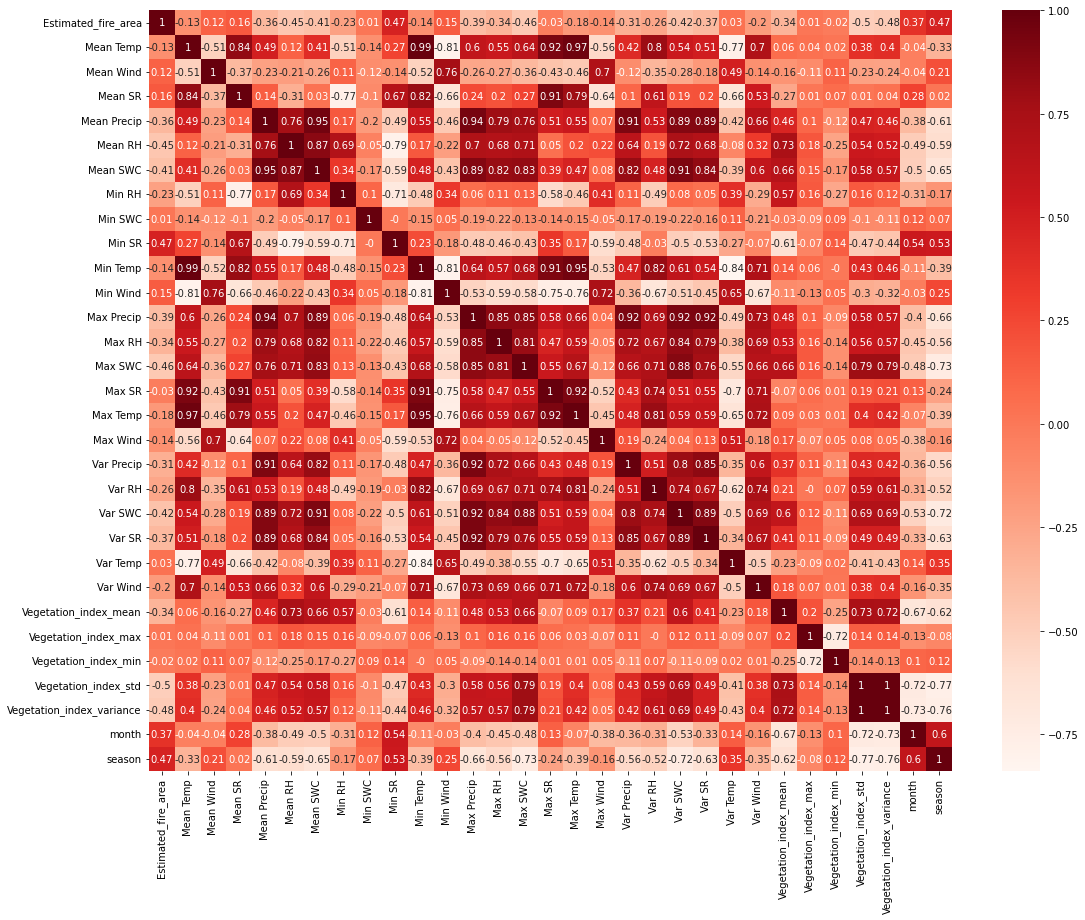

In [87]:
# Pearson Correlation
plt.figure(figsize=(18,14))
cor = df_final.corr()
sns.heatmap(round(cor,2), annot=True, cmap=plt.cm.Reds)
plt.show()

In [88]:
#Correlation with output variable
cor_target = abs(cor["Estimated_fire_area"])
#Selecting highly correlated features
corellated = cor_target[cor_target>0.4]
corellated.sort_values(ascending=False)

Estimated_fire_area          1.000000
Vegetation_index_std         0.497472
Vegetation_index_variance    0.481372
Min SR                       0.470181
season                       0.469351
Max SWC                      0.456378
Mean RH                      0.452238
Var SWC                      0.416568
Mean SWC                     0.405152
Name: Estimated_fire_area, dtype: float64

In [89]:
#Isolating exogenous regressors by correlation
exog_cor = corellated.index.tolist()
exog_cor.remove('Estimated_fire_area') #dependent variable
#exog_cor.remove('Mean SR')
#exog_cor.remove('Max RH')
#exog_cor.remove('Min RH')
#exog_cor.remove('Mean SWC')
#exog_cor.remove('Max SWC')
#exog_cor.remove('Max SR')
#exog_cor.remove('Vegetation_index_variance')
#exog_cor.remove('Vegetation_index_mean')
#exog_cor.remove('season')
exog_cor

['Mean RH',
 'Mean SWC',
 'Min SR',
 'Max SWC',
 'Var SWC',
 'Vegetation_index_std',
 'Vegetation_index_variance',
 'season']

In [90]:
#List all exogenous regressors in data frame
exog_all = df_final.columns.tolist()
exog_all.remove('Estimated_fire_area')
exog_all

['Mean Temp',
 'Mean Wind',
 'Mean SR',
 'Mean Precip',
 'Mean RH',
 'Mean SWC',
 'Min RH',
 'Min SWC',
 'Min SR',
 'Min Temp',
 'Min Wind',
 'Max Precip',
 'Max RH',
 'Max SWC',
 'Max SR',
 'Max Temp',
 'Max Wind',
 'Var Precip',
 'Var RH',
 'Var SWC',
 'Var SR',
 'Var Temp',
 'Var Wind',
 'Vegetation_index_mean',
 'Vegetation_index_max',
 'Vegetation_index_min',
 'Vegetation_index_std',
 'Vegetation_index_variance',
 'month',
 'season',
 'Region']

## Data Modelling with SARIMAX

SARIMAX Models contain parameters: AR(p) I(d) MA(q)

https://towardsdatascience.com/time-series-forecasting-arima-models-7f221e9eee06

### Plot Time Series

<AxesSubplot:xlabel='Date', ylabel='Estimated_fire_area'>

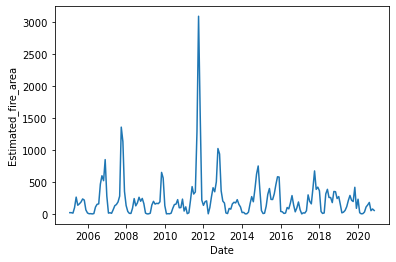

In [91]:
sns.lineplot(x="Date", y="Estimated_fire_area", data=df_final)

### Check Stationarity Tests: Order of Differencing (d)

In [92]:
#Augmented Dickey-Fuller Test for Stationarity

result = adfuller(df_final.Estimated_fire_area, autolag='AIC')

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))  
if (result[1] < 0.05):
    print("The data is stationary")
else:
    print("The data is non-stationary")

ADF Statistic: -6.284525
p-value: 0.000000
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575
The data is stationary


In [93]:
#Order of Differencing (d) in ARIMA
#We cannot reject the Null Hyptothesis. The data is stationary and does not need differencing.
d=0

### AR Terms (p)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


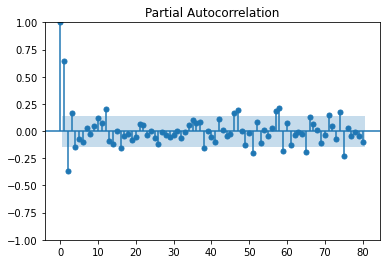

In [94]:
plot_pacf(df_final['Estimated_fire_area'], lags=80)
print()

In [95]:
#Estimate order of the AR term (p)
#The order of the AR term is equal to about 0-1 lags
p=0

### MA Terms (q)

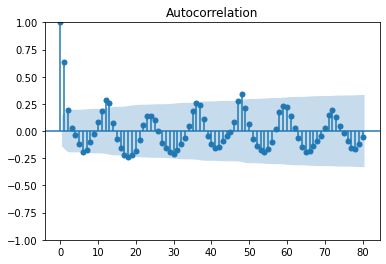

In [96]:
plot_acf(df_final['Estimated_fire_area'], lags=80)
print()

In [97]:
#Find the order of the MA term (q)
#The order of the MA term (q) is equal to about 0-1 lags
q=0

### Seasonality

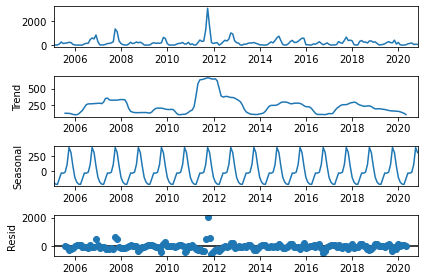

In [98]:
result_seasonal = seasonal_decompose(df_final[['Estimated_fire_area']], model='additive')
result_seasonal.plot()
print()


### Seasonal Stationary Tests: Order of Differencing (D)

In [113]:
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

In [115]:
seasonal = result_seasonal.seasonal
check_stationarity(seasonal)

The series is stationary


In [116]:
dftest = adfuller(result_seasonal.seasonal)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical Values:')
for key, value in dftest[4].items():
    print('\t%s: %.3f' % (key, value))
    
if (dftest[1] < 0.05):
    print("The data is stationary")
else:
    print("The data is non-stationary")

ADF Statistic: -3083209594495220.500000
p-value: 0.000000
Critical Values:
	1%: -3.469
	5%: -2.878
	10%: -2.576
The data is stationary


In [104]:
D=0

### Seasonal AR Terms (P)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


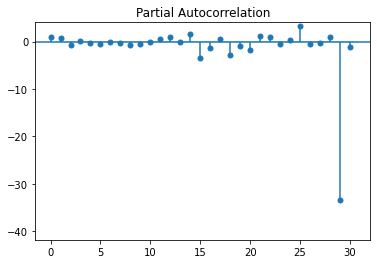

In [118]:
plot_pacf(seasonal, lags =30, auto_ylims=True)
plt.show()

#WARNING: try method='ywm' to fix the values out of range of -1 to 1

In [129]:
P=13

### Seasonal MA Terms (Q)

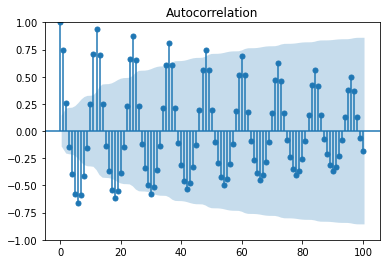

In [121]:
plot_acf(seasonal, lags =100)
plt.show()

In [106]:
Q=0

## Fitting the Model

In [107]:
end_train = '2017-12-31'
start_test = '2017-12-31'
end_test = '2020-11-30'
season_m = 12

In [ ]:
train = df_final.loc[:end_train,'Estimated_fire_area']
exog = df_final.loc[:end_train,exog_all]
mod = SARIMAX(train, exog=exog, trend='n', order=(p,d,q), seasonal_order=(P,D,Q,season_m))
results = mod.fit(maxiter=100)
print(results.summary())

In [ ]:
exog_forecast = df_final.loc[start_test:end_test,exog_all]
predictions = results.predict(start = start_test, end = end_test, exog=exog_forecast, dynamic=True)
print(predictions)

In [ ]:
df_final_test=df_final[['Estimated_fire_area']]
prediction_chart=df_final_test.join(predictions, how='inner')
prediction_chart.plot()

### Accuracy Evaluation

In [ ]:
y_forecasted = prediction_chart.predicted_mean
y_truth = prediction_chart.Estimated_fire_area
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

In [ ]:
results.plot_diagnostics(figsize=(15,12))
plt.show()

## Fitting the Model - Optimization 1

### Using reduced exogenous regressors from Pearson's correlation

In [ ]:
#MODEL OPTIMIZATION 1

train1 = df_final.loc[:end_train,'Estimated_fire_area']
exog1 = df_final.loc[:end_train,exog_cor]
mod1 = SARIMAX(train1, exog=exog1, trend='n', order=(p,d,q), seasonal_order=(P,D,Q,season_m))
results1 = mod1.fit(maxiter=100)
print(results1.summary())

In [ ]:
exog_forecast1 = df_final.loc[start_test:end_test,exog_cor]
predictions1 = results1.predict(start = start_test, end = end_test, exog=exog_forecast1, dynamic=True)
print(predictions1)

In [ ]:
df_final_test1=df_final[['Estimated_fire_area']]
prediction_chart1=df_final_test1.join(predictions1, how='inner')
prediction_chart1.plot()

In [ ]:
results1.plot_diagnostics(figsize=(15, 12))
plt.show()

### Accuracy Evaluation

In [ ]:
y_forecasted1 = prediction_chart1.predicted_mean
y_truth1 = prediction_chart1.Estimated_fire_area
mse1 = ((y_forecasted1 - y_truth1) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse1, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse1), 2)))

## Fitting the Model - Optimization 2

In [130]:
#MODEL OPTIMIZATION 2

train2 = df_final.loc[:end_train,'Estimated_fire_area']
exog2 = df_final.loc[:end_train,['Min SR','Mean RH','Min Temp','season','Vegetation_index_variance']]
mod2 = SARIMAX(train2, exog=exog2, trend='n', order=(p,d,q), seasonal_order=(P,D,Q,season_m))
results2 = mod2.fit(maxiter=100)
print(results2.summary())

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.05050D+00    |proj g|=  1.91107D-01

At iterate    5    f=  7.00674D+00    |proj g|=  3.10933D-02

At iterate   10    f=  7.00061D+00    |proj g|=  1.05440D-02

At iterate   15    f=  7.00012D+00    |proj g|=  3.04284D-03

At iterate   20    f=  6.99992D+00    |proj g|=  2.73978D-03

At iterate   25    f=  6.99983D+00    |proj g|=  1.47768D-03

At iterate   30    f=  6.99907D+00    |proj g|=  9.61498D-03

At iterate   35    f=  6.99615D+00    |proj g|=  7.72510D-03

At iterate   40    f=  6.99544D+00    |proj g|=  2.67688D-03

At iterate   45    f=  6.99534D+00    |proj g|=  2.80209D-03

At iterate   50    f=  6.99461D+00    |proj g|=  1.89117D-02

At iterate   55    f=  6.97898D+00    |proj g|=  3.73157D-02

At iterate   60    f=  6.97187D+00    |proj g|=  9.24093D-03

At iterate   65    f=  6.9

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate  100    f=  6.92775D+00    |proj g|=  2.71169D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19    100    108      1     0     0   2.712D-02   6.928D+00
  F =   6.9277503552344273     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                                 SARIMAX Results                                 
Dep. Variable:       Estimated_fire_area   No. Observations:                  156
Model:             SARIMAX(13, 0, 0, 12)   Log Likelihood               -1080.729
Date:                   Sat, 01 Jan 2022   AIC                           2199.458
Time:                           1

In [132]:
exog_forecast2 = df_final.loc[start_test:end_test,['Min SR','Mean RH','Min Temp','season','Vegetation_index_variance']]
predictions2 = results2.predict(start = start_test, end = end_test, exog=exog_forecast2, dynamic=True)
print(predictions2)

2017-12-31     294.557330
2018-01-31     300.474991
2018-02-28    -231.656145
2018-03-31      -6.853025
2018-04-30    -218.029961
2018-05-31     120.703769
2018-06-30     158.469214
2018-07-31     249.686478
2018-08-31     638.598912
2018-09-30    1977.983100
2018-10-31    1263.180194
2018-11-30     223.246107
2018-12-31     476.414313
2019-01-31     327.055551
2019-02-28     345.356254
2019-03-31     141.496651
2019-04-30      29.744722
2019-05-31     121.393089
2019-06-30      98.033503
2019-07-31      93.569089
2019-08-31     683.638052
2019-09-30    1954.384858
2019-10-31    1347.467519
2019-11-30     555.438313
2019-12-31     665.685246
2020-01-31     616.114370
2020-02-29      80.486430
2020-03-31    -242.225338
2020-04-30     -59.116344
2020-05-31     235.994192
2020-06-30     126.462131
2020-07-31     163.672122
2020-08-31     -18.987462
2020-09-30     -37.665986
2020-10-31     513.076638
2020-11-30     378.332992
Freq: M, Name: predicted_mean, dtype: float64


<AxesSubplot:>

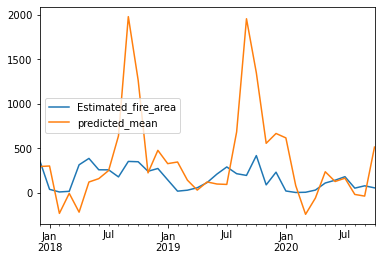

In [133]:
df_final_test2=df_final[['Estimated_fire_area']]
prediction_chart2=df_final_test2.join(predictions2, how='inner')
prediction_chart2.plot()

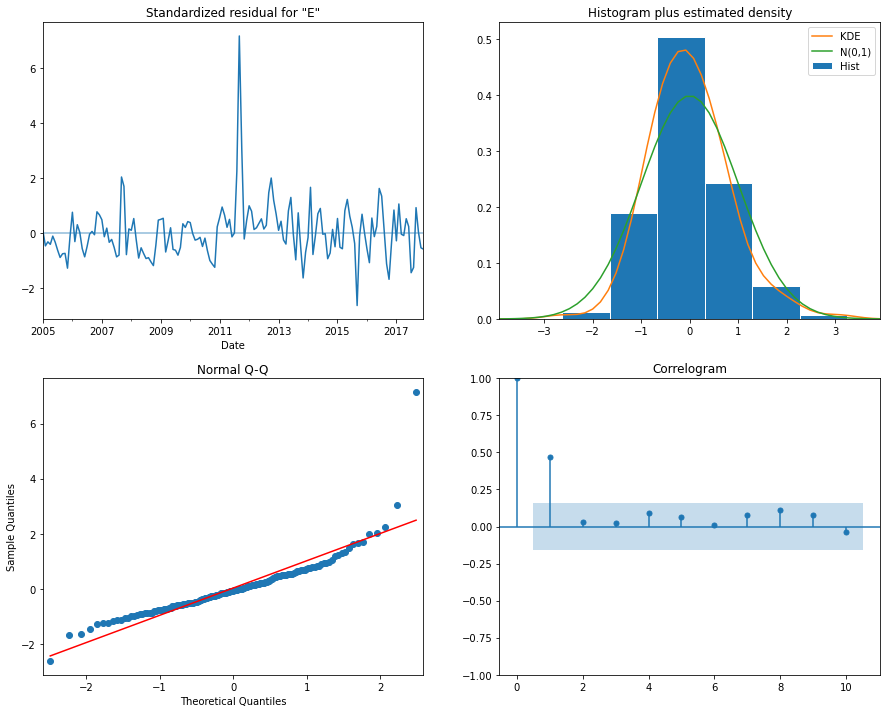

In [111]:
results2.plot_diagnostics(figsize=(15, 12))
plt.show()

### Accuracy Evaluation

In [112]:
y_forecasted2 = prediction_chart2.predicted_mean
y_truth2 = prediction_chart2.Estimated_fire_area
mse2 = ((y_forecasted2 - y_truth2) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse2, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse2), 2)))

The Mean Squared Error is 288700.44
The Root Mean Squared Error is 537.31
